<a href="https://colab.research.google.com/github/shivm1908/NEUR-3002/blob/main/NEW_Leaky_Integrate_and_Fire_(Students)FINAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This code builds on the I&F code from our in-class activity. Your goal here is to understand how computationally altering the code can allow us to add/subtract biological details, in this case, the leak current. Fill in the accompanying worksheet on Canvas titled "Homework 1, LIF"**

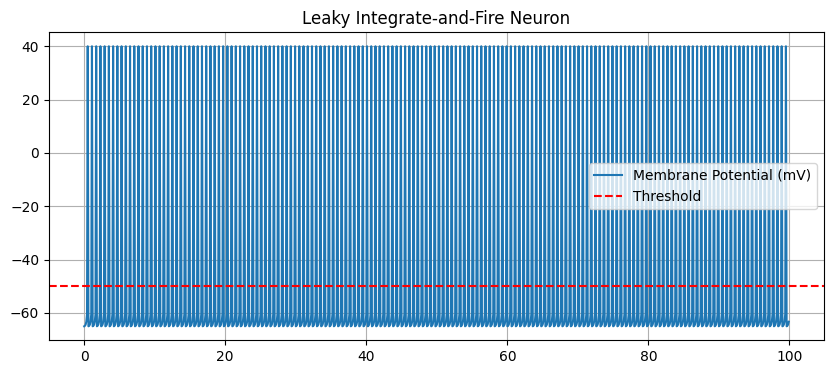

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# --- Time setup ---
T = 100      # total time (ms)
dt = 0.1     # step size (ms)
time = np.arange(0, T, dt)

# --- Neuron parameters ---
C = 200.0            # capacitance (pF)
g_L = 15.0          # leak conductance (nS) with toxin
tau_m = C / g_L      # time constant of leak (ms)
E_L = -65.0          # resting potential (mV)
V_th = -50.0         # threshold (mV)
V_reset = -65.0      # reset voltage (mV)
I_ext = 350.0        # constant input current (pA)

# --- Initialize voltage and spike list ---
V = np.full_like(time, E_L)
spike_times = []

# --- Simulation loop ---
for i in range(1, len(time)):
    # Missing leak term; only the external current is used
    dV = (g_L * (V[i-1] - E_L) + I_ext / C) * dt
    V[i] = V[i-1] + dV

    # Check if voltage is increasing linearly (leak term is missing)
    if i > 10:  # Start checking after a few iterations
        if np.allclose(np.diff(V[i-10:i][V[i-10:i] < V_th]), np.diff(V[i-10:i][V[i-10:i] < V_th])[0], atol=1e-3):
            raise RuntimeError("Voltage is increasing linearly — did you forget the leak term?")

    if V[i] >= V_th:
        V[i-1] = 40.0       # mark spike visually
        V[i] = V_reset
        spike_times.append(time[i])

# --- Plotting ---
plt.figure(figsize=(10, 4))
plt.plot(time, V, label='Membrane Potential (mV)')
plt.axhline(V_th, color='r', linestyle='--', label='Threshold')
plt.xlabel('') #what should this be labeled as?
plt.ylabel('') #what should this be labeled as?
plt.title('Leaky Integrate-and-Fire Neuron')
plt.legend()
plt.grid(True)
plt.show()

